In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA PREPROCESSING

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("Live_20210128.csv")


In [13]:
df["Column1"].unique()

array([nan])

In [14]:
df.shape

(7050, 15)

In [15]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# READING DATA 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   object 
 1   status_published  7050 non-null   object 
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
 11  Column1           0 non-null      float64
 12  Column2           0 non-null      float64
 13  Column3           0 non-null      float64
 14  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(2)
memory usage: 826.3+ KB


In [17]:
df.isnull().sum()

status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [18]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'],axis=1,inplace=True)

In [19]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [20]:
len(df["status_published"].unique())

6913

In [23]:
df.drop(["status_published"],axis=1,inplace=True)

In [24]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# ENCODING ALL INTO NUMERICAL DATA

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=df['status_type']

y=le.fit_transform(y)

In [35]:
x=df.drop(["status_type"],axis=1)

In [36]:
x["status_type"]=y

In [37]:
x

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,529,512,262,432,92,3,1,1,0,3
1,150,0,0,150,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,3
3,111,0,0,111,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,1
7046,16,0,0,14,1,0,1,0,0,1
7047,2,0,0,1,1,0,0,0,0,1
7048,351,12,22,349,2,0,0,0,0,1


# FEATURE SCALING

In [38]:
cols=x.columns

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [43]:
X = pd.DataFrame(x, columns=[cols])

In [44]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.000000
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1.000000
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.333333
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.333333
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.333333


IMPLEMENTING  KMEANS MODEL

In [65]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [66]:
kmeans.inertia_

237.75726404419646

# Check quality of weak classification by the model

In [67]:
labels=kmeans.labels_
correct_labels =sum(y==labels)

In [68]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


## WITH OTHER CLUSTERS

In [69]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
#check how many of samples were correctly labeled

labels=kmeans.labels_
correct_label=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


In [71]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


# LETS TRY APPLYING ELBOW METHOD

In [73]:
inertia=[]
K_range=range(1,11)

In [78]:
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

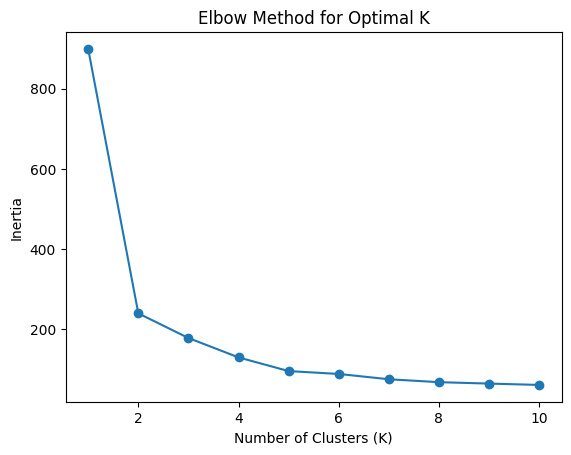

In [79]:
plt.plot(K_range, inertia, marker='o')  
plt.xlabel("Number of Clusters (K)")  
plt.ylabel("Inertia")  
plt.title("Elbow Method for Optimal K")  
plt.show()  


In [82]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)
#check how many of samples were correctly labeled

labels=kmeans.labels_
correct_label=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58
